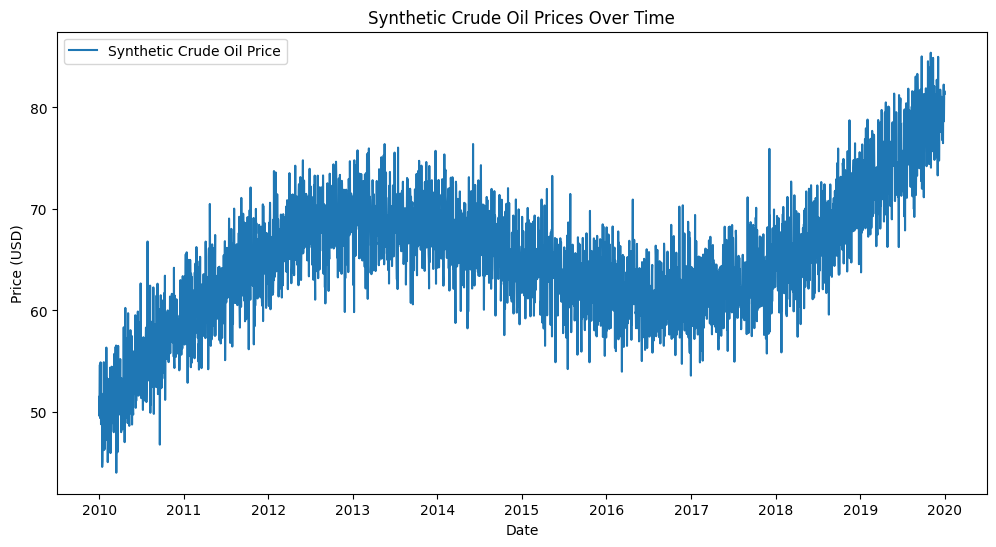

ADF Statistic: -1.3066433149566616
p-value: 0.6261275348087799
ADF Statistic (Differenced): -19.51729714492633
p-value (Differenced): 0.0


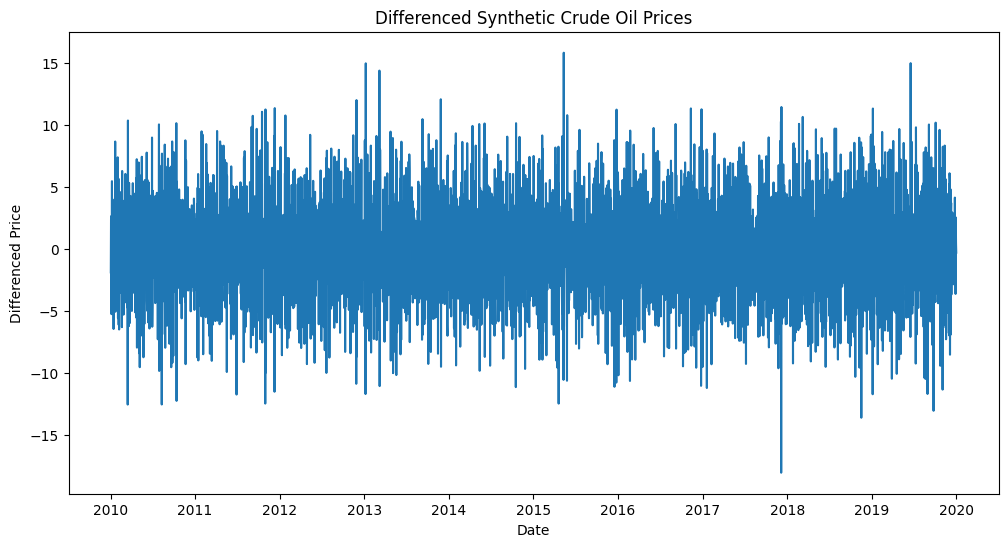

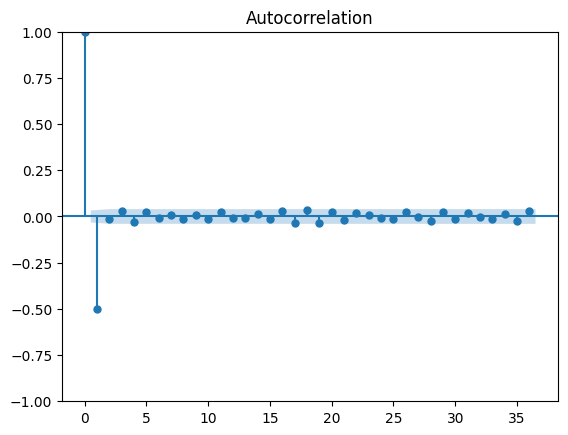

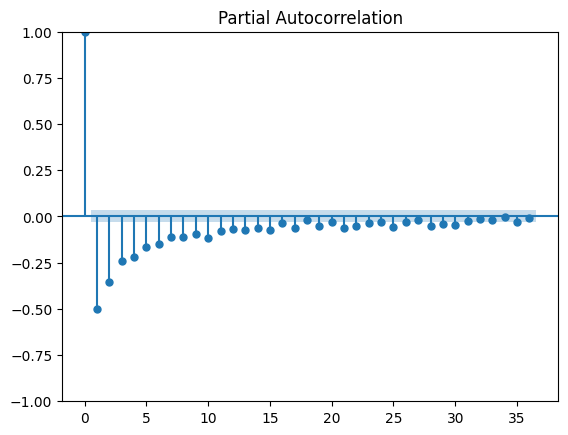

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 3653
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9243.617
Date:                Sat, 12 Apr 2025   AIC                          18493.233
Time:                        06:42:57   BIC                          18511.842
Sample:                    01-01-2010   HQIC                         18499.860
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0310      0.017     -1.774      0.076      -0.065       0.003
ma.L1         -0.9534      0.005   -181.071      0.000      -0.964      -0.943
sigma2         9.2412      0.214     43.103      0.0

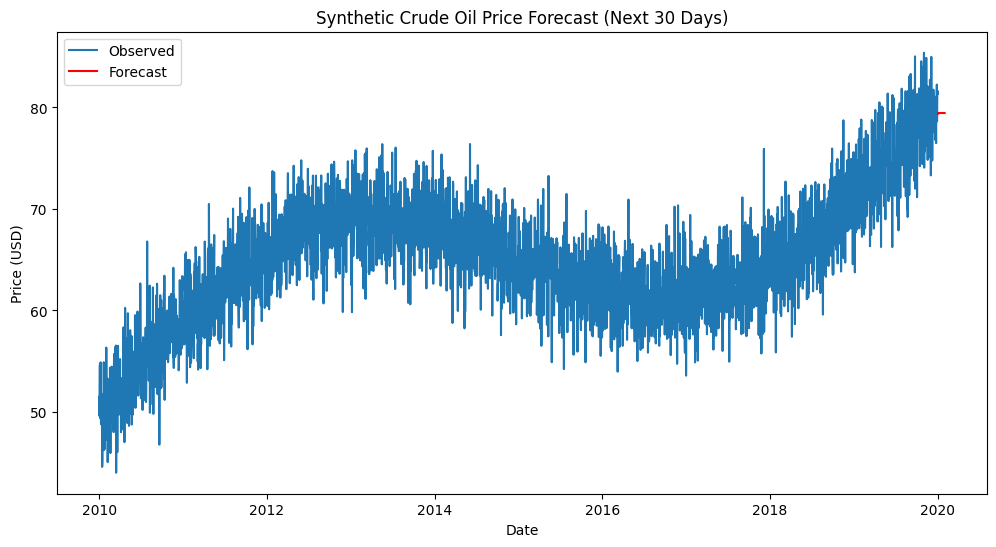

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 1: Generate Synthetic Crude Oil Price Data
np.random.seed(42)

# Generate a date range (daily data for 10 years)
date_range = pd.date_range(start='2010-01-01', end='2020-01-01', freq='D')

# Create a synthetic trend (e.g., increasing prices with noise)
trend = np.linspace(50, 80, len(date_range))  # A simple linear increasing trend from 50 to 80

# Create a seasonal component (sine wave with period of 365 days to simulate yearly seasonality)
seasonal = 10 * np.sin(np.linspace(0, 2 * np.pi, len(date_range)))  # Seasonal fluctuation

# Create random noise (normal distribution)
noise = np.random.normal(loc=0, scale=3, size=len(date_range))  # Random noise with mean 0 and stddev of 3

# Generate the synthetic crude oil prices (trend + seasonal + noise)
oil_prices = trend + seasonal + noise

# Create a DataFrame
data = pd.DataFrame({'Date': date_range, 'Price': oil_prices})

# Set Date as the index
data.set_index('Date', inplace=True)

# Step 2: Visualize the Synthetic Data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Synthetic Crude Oil Price')
plt.title('Synthetic Crude Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Step 3: Perform ADF Test to Check for Stationarity
result = adfuller(data['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the p-value is greater than 0.05, the series is non-stationary and requires differencing
if result[1] > 0.05:
    # Apply differencing to make the data stationary
    data_diff = data['Price'].diff().dropna()

    # Perform ADF test again on the differenced data
    result_diff = adfuller(data_diff)
    print('ADF Statistic (Differenced):', result_diff[0])
    print('p-value (Differenced):', result_diff[1])

    # Plot differenced data
    plt.figure(figsize=(12, 6))
    plt.plot(data_diff)
    plt.title('Differenced Synthetic Crude Oil Prices')
    plt.xlabel('Date')
    plt.ylabel('Differenced Price')
    plt.show()

# Step 4: Plot ACF and PACF to Determine ARIMA Parameters
plot_acf(data_diff)
plot_pacf(data_diff)
plt.show()

# Step 5: Fit ARIMA Model (p=1, d=1, q=1)
model = ARIMA(data['Price'], order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Step 6: Forecast the Next 30 Days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Price'], label='Observed')
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:]
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Synthetic Crude Oil Price Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Step 7: Evaluate the Model (Optional)
# If you have actual future data, you can compare the predicted values to the real values and calculate the Mean Squared Error (MSE)
# Example:
# test_data = ...
# mse = mean_squared_error(test_data, forecast)
# print(f'Mean Squared Error: {mse}')
